In [1]:
!pip install tensorflow==2.17.0

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2024-09-26 18:32:31.519136: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-26 18:32:31.519921: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-26 18:32:31.523532: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-26 18:32:31.535348: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 18:32:31.554381: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils 

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results    

In [5]:
def draw_landmark(image, results): 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 


In [7]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        image, results = mediapipe_detection(frame, holistic)
        #print(results)

        draw_styled_landmarks(image, results)
        
        cv2.imshow('OpenCV Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


I0000 00:00:1727368354.137312   26995 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1727368354.141487   27102 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.1.3-arch1.1), renderer: Mesa Intel(R) Graphics (RPL-U)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1727368354.244156   27095 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727368354.265492   27086 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727368354.266380   27089 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727368354.267332   27097 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inferen

In [8]:
#len(results.left_hand_landmarks.landmark)

mp_holistic.POSE_CONNECTIONS

In [9]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [10]:
draw_landmark(frame, results)

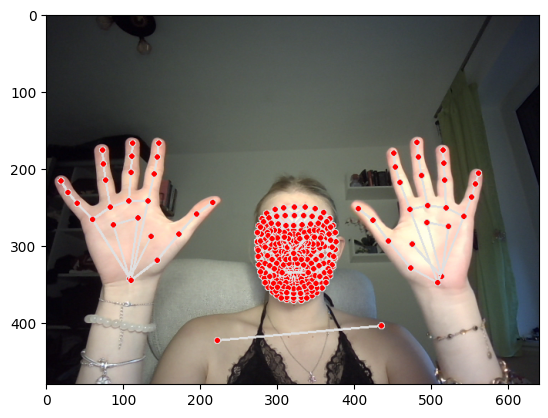

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
for res in results.pose_landmarks.landmark: 
   test = np.array([res.x, res.y, res.z, res.visibility])

In [14]:
test

array([ 3.81118774e-01,  2.53093433e+00, -3.99028242e-01,  6.78778815e-05])

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose

[array([ 0.5029301 ,  0.64708078, -1.36680269,  0.99996173]),
 array([ 0.52961212,  0.60266417, -1.32723391,  0.99990118]),
 array([ 0.54510564,  0.60341799, -1.32664883,  0.99991274]),
 array([ 0.55766195,  0.60450685, -1.32651019,  0.9999063 ]),
 array([ 0.48366922,  0.60327709, -1.30087328,  0.9998669 ]),
 array([ 0.46994933,  0.60463822, -1.301229  ,  0.99987316]),
 array([ 0.45858335,  0.60682976, -1.30121863,  0.99986577]),
 array([ 0.58117098,  0.62971663, -1.0466938 ,  0.99994439]),
 array([ 0.44437259,  0.63066471, -0.91236573,  0.99990284]),
 array([ 0.53169519,  0.69869584, -1.25876093,  0.99987793]),
 array([ 0.4782362 ,  0.69966757, -1.223333  ,  0.99983752]),
 array([ 0.68080664,  0.8436144 , -0.88077259,  0.99897164]),
 array([ 0.34827572,  0.8819738 , -0.61971062,  0.99845332]),
 array([ 0.89542133,  1.01428843, -1.41459966,  0.89361298]),
 array([ 0.1011582 ,  1.05884814, -1.10800052,  0.93777102]),
 array([ 0.80306196,  0.70956689, -1.67669749,  0.91195577]),
 array([

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [18]:
res.y

2.5309343338012695

In [19]:
lh

array([ 7.94884384e-01,  7.26452410e-01,  2.48124508e-07,  7.39880085e-01,
        6.87449157e-01, -1.40231522e-02,  6.94804430e-01,  6.13073111e-01,
       -1.71648972e-02,  6.63153112e-01,  5.56609690e-01, -2.07871255e-02,
        6.33050025e-01,  5.25964081e-01, -2.40082238e-02,  7.38619030e-01,
        5.27759492e-01,  2.84963544e-03,  7.18121171e-01,  4.56071854e-01,
       -7.23639596e-03,  7.09271371e-01,  4.12531495e-01, -1.80349723e-02,
        7.05253661e-01,  3.76530349e-01, -2.68685520e-02,  7.74538279e-01,
        5.17529249e-01, -1.48923683e-03,  7.61057615e-01,  4.36738491e-01,
       -8.46203510e-03,  7.55264878e-01,  3.86529565e-01, -1.83356553e-02,
        7.51887798e-01,  3.46874714e-01, -2.63470281e-02,  8.11414003e-01,
        5.24599314e-01, -9.55356192e-03,  8.09099555e-01,  4.48461711e-01,
       -1.98935736e-02,  8.07687938e-01,  4.03868794e-01, -2.81902757e-02,
        8.05734754e-01,  3.67596060e-01, -3.44828963e-02,  8.47338855e-01,
        5.47290266e-01, -

In [20]:
pose

array([ 5.02930105e-01,  6.47080779e-01, -1.36680269e+00,  9.99961734e-01,
        5.29612124e-01,  6.02664173e-01, -1.32723391e+00,  9.99901175e-01,
        5.45105636e-01,  6.03417993e-01, -1.32664883e+00,  9.99912739e-01,
        5.57661951e-01,  6.04506850e-01, -1.32651019e+00,  9.99906301e-01,
        4.83669221e-01,  6.03277087e-01, -1.30087328e+00,  9.99866903e-01,
        4.69949335e-01,  6.04638219e-01, -1.30122900e+00,  9.99873161e-01,
        4.58583355e-01,  6.06829762e-01, -1.30121863e+00,  9.99865770e-01,
        5.81170976e-01,  6.29716635e-01, -1.04669380e+00,  9.99944389e-01,
        4.44372594e-01,  6.30664706e-01, -9.12365735e-01,  9.99902844e-01,
        5.31695187e-01,  6.98695838e-01, -1.25876093e+00,  9.99877930e-01,
        4.78236198e-01,  6.99667573e-01, -1.22333300e+00,  9.99837518e-01,
        6.80806637e-01,  8.43614399e-01, -8.80772591e-01,  9.98971641e-01,
        3.48275721e-01,  8.81973803e-01, -6.19710624e-01,  9.98453319e-01,
        8.95421326e-01,  

In [21]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [22]:
extract_keypoints(results)

array([ 0.5029301 ,  0.64708078, -1.36680269, ...,  0.03011853,
        0.45152426, -0.04558959])

In [23]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['X', 'Y', 'Z'])
no_sequences = 30
#'A', 'B', 'C', 'D', 'E', 'F' , 'G', 'H', 'I' ,'J', 'K', 'L', ,'M', 'N', 'O'  'P', 'Q', 'R', 'S', 'T', 'U','V', 'W', 'X'   
sequence_length = 30

In [24]:
#keypoints

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'X': 0, 'Y': 1, 'Z': 2}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [29]:
np.array(sequences).shape

(90, 30, 1662)

In [30]:
np.array(labels).shape

(90,)

In [31]:
X = np.array(sequences)

In [32]:
X.shape

(90, 30, 1662)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [36]:
y_train.shape

(85, 3)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [38]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [39]:
model1 = Sequential()
model1.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model1.add(LSTM(128, return_sequences=True, activation='relu'))
model1.add(LSTM(64, return_sequences=False, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(actions.shape[0], activation='softmax'))

I0000 00:00:1727368359.685357   26995 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-26 18:32:39.689903: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/sophie/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(Dropout(0.2))  # Add dropout after LSTM layers
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [41]:
optimizer = Adam(learning_rate=0.001)  # Try a smaller learning rate if the model struggles
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.3288 - loss: 1.1126
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.3503 - loss: 1.1266
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.3835 - loss: 1.0911
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.4697 - loss: 1.0708
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.3405 - loss: 1.1182
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.3151 - loss: 1.1036
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3249 - loss: 1.0977
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.3797 - loss: 1.0808
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4383 - loss: 1.0735
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.3581 - loss: 1.1108
Epoch 11/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.3131 - loss: 1.1179
Epoch 12/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy

KeyboardInterrupt: 

In [44]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,675 (2.28 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


In [ ]:
actions[np.argmax(res[2])]

In [ ]:
#actions[np.argmax(y_test[2])]model.save('action.h5')

In [52]:
model.save('actionXYZ.h5')

In [53]:
model.save('actionXYZ.keras')

In [ ]:
#del model

In [ ]:
#model.load_weights('action.h5')

In [46]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [47]:
yhat = model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [48]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
ytrue

In [ ]:
yhat

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [49]:
accuracy_score(ytrue, yhat)

0.9058823529411765

In [ ]:
threshold = 0.8

In [50]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:


plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))



In [51]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1727368424.035691   26995 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1727368424.038396   28989 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.1.3-arch1.1), renderer: Mesa Intel(R) Graphics (RPL-U)
W0000 00:00:1727368424.134542   28978 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727368424.161438   28975 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727368424.162678   28978 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727368424.163134   28975 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
np.expand_dims(X_test[0], axis=0)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))